# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Your-first-neural-network" data-toc-modified-id="Your-first-neural-network-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Your first neural network</a></div><div class="lev2 toc-item"><a href="#Load-and-prepare-the-data" data-toc-modified-id="Load-and-prepare-the-data-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load and prepare the data</a></div><div class="lev2 toc-item"><a href="#Checking-out-the-data" data-toc-modified-id="Checking-out-the-data-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Checking out the data</a></div><div class="lev3 toc-item"><a href="#Dummy-variables" data-toc-modified-id="Dummy-variables-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Dummy variables</a></div><div class="lev3 toc-item"><a href="#Scaling-target-variables" data-toc-modified-id="Scaling-target-variables-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Scaling target variables</a></div><div class="lev3 toc-item"><a href="#Splitting-the-data-into-training,-testing,-and-validation-sets" data-toc-modified-id="Splitting-the-data-into-training,-testing,-and-validation-sets-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Splitting the data into training, testing, and validation sets</a></div><div class="lev2 toc-item"><a href="#Time-to-build-the-network" data-toc-modified-id="Time-to-build-the-network-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time to build the network</a></div><div class="lev2 toc-item"><a href="#Training-the-network" data-toc-modified-id="Training-the-network-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Training the network</a></div><div class="lev3 toc-item"><a href="#Choose-the-number-of-epochs" data-toc-modified-id="Choose-the-number-of-epochs-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Choose the number of epochs</a></div><div class="lev3 toc-item"><a href="#Choose-the-learning-rate" data-toc-modified-id="Choose-the-learning-rate-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Choose the learning rate</a></div><div class="lev3 toc-item"><a href="#Choose-the-number-of-hidden-nodes" data-toc-modified-id="Choose-the-number-of-hidden-nodes-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Choose the number of hidden nodes</a></div><div class="lev4 toc-item"><a href="#HIDDEN-NODES-NUMBER" data-toc-modified-id="HIDDEN-NODES-NUMBER-1431"><span class="toc-item-num">1.4.3.1&nbsp;&nbsp;</span>HIDDEN NODES NUMBER</a></div><div class="lev4 toc-item"><a href="#CHOOSE-LEARNING-RATE-AND-EPOCHS" data-toc-modified-id="CHOOSE-LEARNING-RATE-AND-EPOCHS-1432"><span class="toc-item-num">1.4.3.2&nbsp;&nbsp;</span>CHOOSE LEARNING RATE AND EPOCHS</a></div><div class="lev4 toc-item"><a href="#Check-parameters-chosen-3-times-to-see-if-there-is-too-much-variance-in-training" data-toc-modified-id="Check-parameters-chosen-3-times-to-see-if-there-is-too-much-variance-in-training-1433"><span class="toc-item-num">1.4.3.3&nbsp;&nbsp;</span>Check parameters chosen 3 times to see if there is too much variance in training</a></div><div class="lev3 toc-item"><a href="#Train-network-with-chosen-parameters-(7nodes,-lr=0.2,-80-epochs)" data-toc-modified-id="Train-network-with-chosen-parameters-(7nodes,-lr=0.2,-80-epochs)-144"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Train network with chosen parameters (7nodes, lr=0.2, 80 epochs)</a></div><div class="lev2 toc-item"><a href="#Check-out-your-predictions" data-toc-modified-id="Check-out-your-predictions-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Check out your predictions</a></div><div class="lev2 toc-item"><a href="#Thinking-about-your-results" data-toc-modified-id="Thinking-about-your-results-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Thinking about your results</a></div><div class="lev4 toc-item"><a href="#Your-answer-below" data-toc-modified-id="Your-answer-below-1601"><span class="toc-item-num">1.6.0.1&nbsp;&nbsp;</span>Your answer below</a></div><div class="lev2 toc-item"><a href="#Unit-tests" data-toc-modified-id="Unit-tests-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Unit tests</a></div>

In [55]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Your first neural network

In this project, you'll build your first neural network and use it to predict daily bike rental ridership. We've provided some of the code, but left the implementation of the neural network up to you (for the most part). After you've submitted this project, feel free to explore the data and the model more.



In [56]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

## Load and prepare the data

A critical step in working with neural networks is preparing the data correctly. Variables on different scales make it difficult for the network to efficiently learn the correct weights. Below, we've written the code to load and prepare the data. You'll learn more about this soon!

In [57]:
data_path = 'Bike-Sharing-Dataset/hour.csv'

rides = pd.read_csv(data_path)

In [58]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Checking out the data

This dataset has the number of riders for each hour of each day from January 1 2011 to December 31 2012. The number of riders is split between casual and registered, summed up in the `cnt` column. You can see the first few rows of the data above.

Below is a plot showing the number of bike riders over the first 10 days in the data set. You can see the hourly rentals here. This data is pretty complicated! The weekends have lower over all ridership and there are spikes when people are biking to and from work during the week. Looking at the data above, we also have information about temperature, humidity, and windspeed, all of these likely affecting the number of riders. You'll be trying to capture all this with your model.

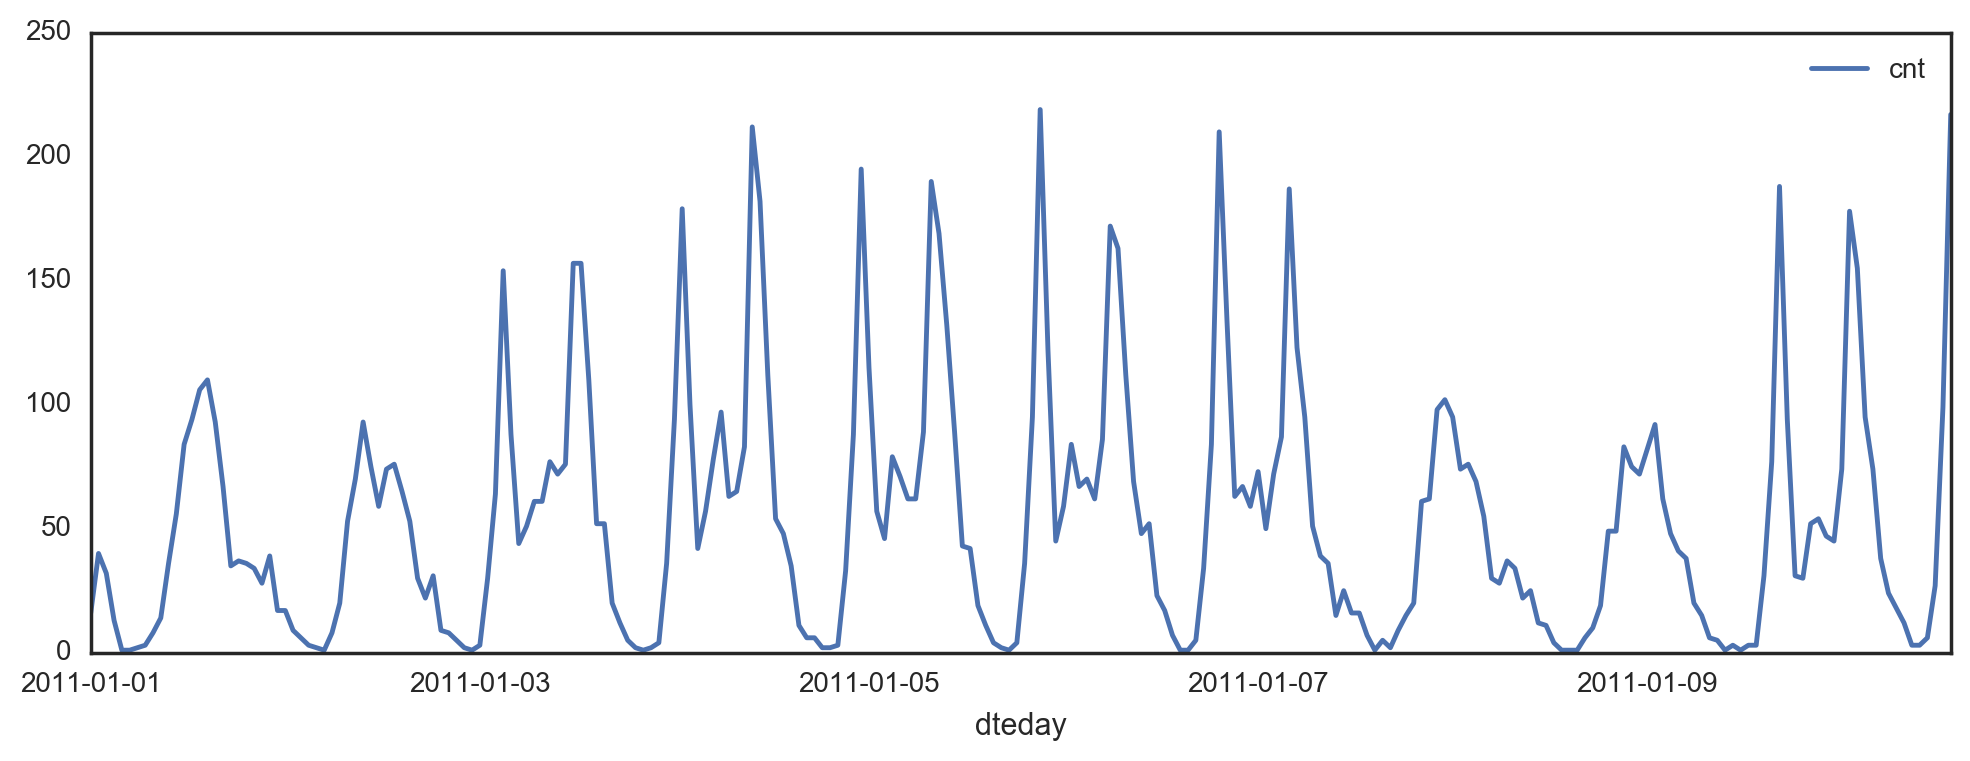

In [59]:
rides[:24*10].plot(x='dteday', y='cnt', figsize=(12,4))

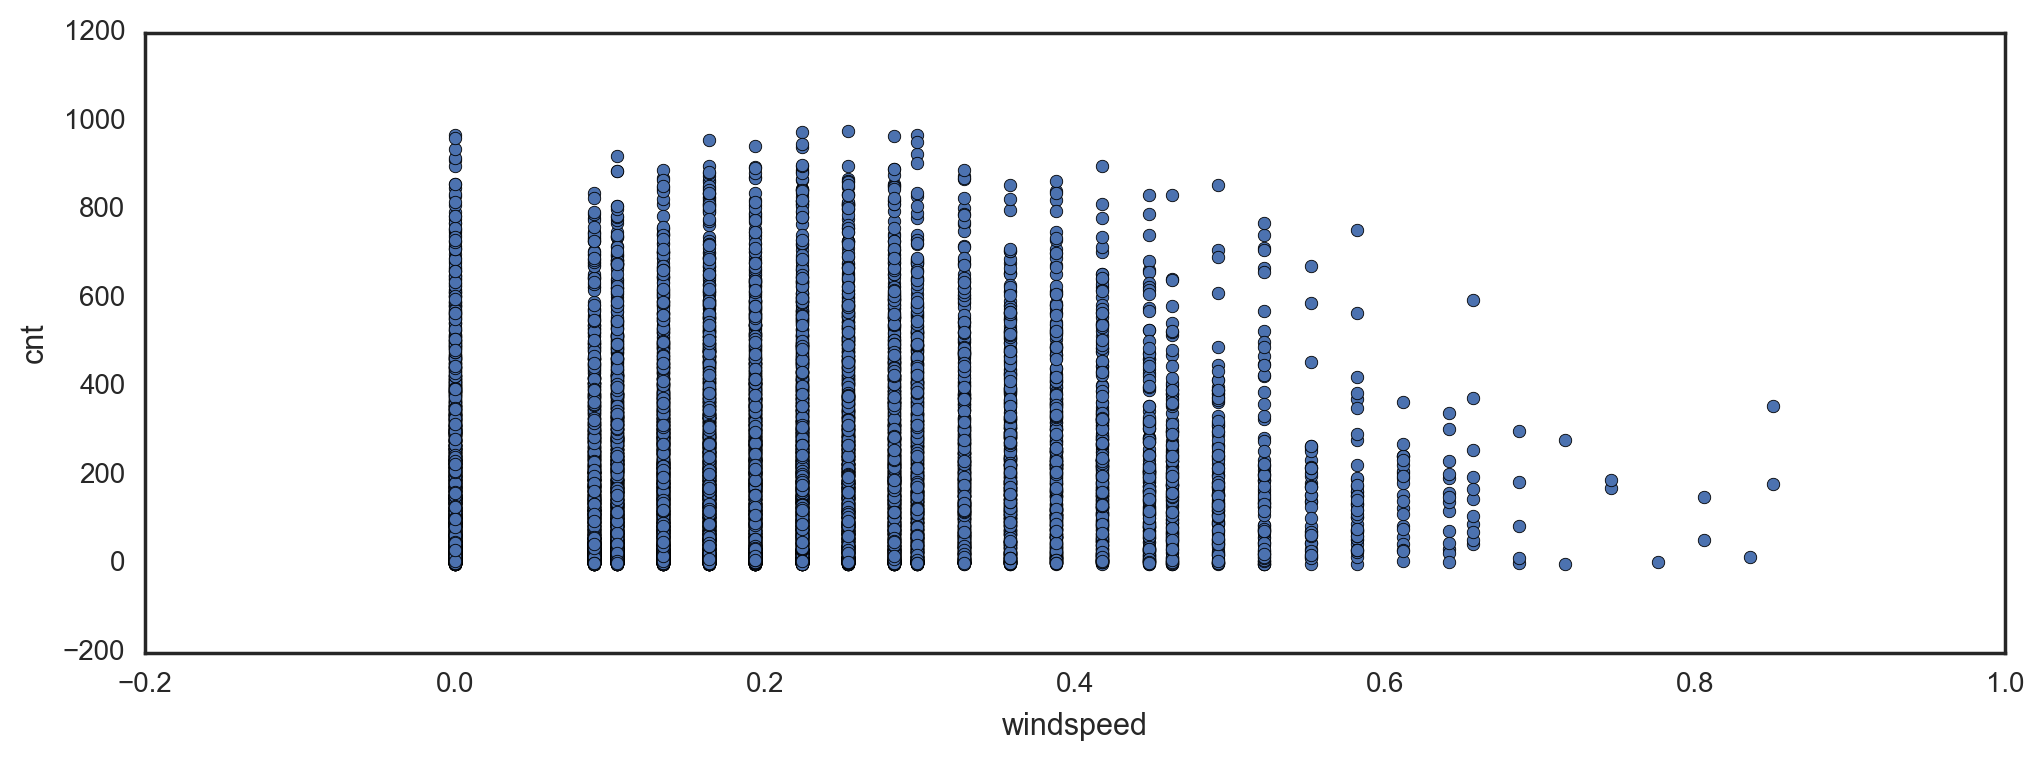

In [60]:
rides.plot(x='windspeed', y='cnt', figsize=(12,4), kind='scatter');

### Dummy variables
Here we have some categorical variables like season, weather, month. To include these in our model, we'll need to make binary dummy variables. This is simple to do with Pandas thanks to `get_dummies()`.

In [61]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head(5)

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0.22,0.80,0.0,8,32,40,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0.22,0.80,0.0,5,27,32,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0.24,0.75,0.0,3,10,13,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0.24,0.75,0.0,0,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Scaling target variables
To make training the network easier, we'll standardize each of the continuous variables. That is, we'll shift and scale the variables such that they have zero mean and a standard deviation of 1.

The scaling factors are saved so we can go backwards when we use the network for predictions.

In [62]:
quant_features = ['casual', 'registered', 'cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

### Splitting the data into training, testing, and validation sets

We'll save the last 21 days of the data to use as a test set after we've trained the network. We'll use this set to make predictions and compare them with the actual number of riders.

In [63]:
# Save the last 21 days 
test_data = data[-21*24:]
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt', 'casual', 'registered']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

We'll split the data into two sets, one for training and one for validating as the network is being trained. Since this is time series data, we'll train on historical data, then try to predict on future data (the validation set).

In [64]:
# Hold out the last 60 days of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

## Time to build the network

Below you'll build your network. We've built out the structure and the backwards pass. You'll implement the forward pass through the network. You'll also set the hyperparameters: the learning rate, the number of hidden units, and the number of training passes.

The network has two layers, a hidden layer and an output layer. The hidden layer will use the sigmoid function for activations. The output layer has only one node and is used for the regression, the output of the node is the same as the input of the node. That is, the activation function is $f(x)=x$. A function that takes the input signal and generates an output signal, but takes into account the threshold, is called an activation function. We work through each layer of our network calculating the outputs for each neuron. All of the outputs from one layer become inputs to the neurons on the next layer. This process is called *forward propagation*.

We use the weights to propagate signals forward from the input to the output layers in a neural network. We use the weights to also propagate error backwards from the output back into the network to update our weights. This is called *backpropagation*.

> **Hint:** You'll need the derivative of the output activation function ($f(x) = x$) for the backpropagation implementation. If you aren't familiar with calculus, this function is equivalent to the equation $y = x$. What is the slope of that equation? That is the derivative of $f(x)$.

Below, you have these tasks:
1. Implement the sigmoid function to use as the activation function. Set `self.activation_function` in `__init__` to your sigmoid function.
2. Implement the forward pass in the `train` method.
3. Implement the backpropagation algorithm in the `train` method, including calculating the output error.
4. Implement the forward pass in the `run` method.
  

> NOTES:
> For clarification, I include schema of overall net (with names for forward pass) as well as whole equation for computing update step for both weights (input-to-hidden and hidden-to-output), using chain rule


<img src='_schema.png', width=800>
<img src='_w_input_hidden.png', width=600>
<img src='_w_hidden_output.png', width=600>

In [66]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = lambda x: (1+np.exp(-x))**-1

    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        #### Implement the forward pass here ####
        
        # HIDDEN LAYER
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
    
        # sigmoid (w_hidden*input)
        hidden_outputs = self.activation_function(hidden_inputs)# signals from hidden layer
        
        # OUTPUT LAYER
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)# signals into final output layer
        
        # output = w_output * input
        final_outputs = final_inputs  # signals from final output layer
        
        #### Implement the backward pass here ####
        ### Backward pass ###
        
        output_errors = targets - final_outputs # Output layer error is the difference between desired target and actual output.
        
        hidden_grad = (hidden_outputs* (1-hidden_outputs))
        hidden_errors = np.dot(self.weights_hidden_to_output.T, output_errors)*hidden_grad
                
        
        self.weights_hidden_to_output += self.lr * np.dot(output_errors, hidden_outputs.T)
        self.weights_input_to_hidden += self.lr * np.dot(hidden_errors, inputs.T) 
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)
        final_outputs = final_inputs
        
        return final_outputs

In [67]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

## Training the network

Here you'll set the hyperparameters for the network. The strategy here is to find hyperparameters such that the error on the training set is low, but you're not overfitting to the data. If you train the network too long or have too many hidden nodes, it can become overly specific to the training set and will fail to generalize to the validation set. That is, the loss on the validation set will start increasing as the training set loss drops.

You'll also be using a method know as Stochastic Gradient Descent (SGD) to train the network. The idea is that for each training pass, you grab a random sample of the data instead of using the whole data set. You use many more training passes than with normal gradient descent, but each pass is much faster. This ends up training the network more efficiently. You'll learn more about SGD later.

### Choose the number of epochs
This is the number of times the dataset will pass through the network, each time updating the weights. As the number of epochs increases, the network becomes better and better at predicting the targets in the training set. You'll need to choose enough epochs to train the network well but not too many or you'll be overfitting.

### Choose the learning rate
This scales the size of weight updates. If this is too big, the weights tend to explode and the network fails to fit the data. A good choice to start at is 0.1. If the network has problems fitting the data, try reducing the learning rate. Note that the lower the learning rate, the smaller the steps are in the weight updates and the longer it takes for the neural network to converge.

### Choose the number of hidden nodes
The more hidden nodes you have, the more accurate predictions the model will make. Try a few different numbers and see how it affects the performance. You can look at the losses dictionary for a metric of the network performance. If the number of hidden units is too low, then the model won't have enough space to learn and if it is too high there are too many options for the direction that the learning can take. The trick here is to find the right balance in number of hidden units you choose.

#### HIDDEN NODES NUMBER
To choose the number of hidden nodes, I trained the net using a range of nodes from 2 to 9, 10 times each. And then, plotted the validation error. As a consequence, 7 nodes seemed the best option.

In [137]:
from sklearn.externals import joblib
# joblib.dump(results, 'results.pkl', compress=3)
# joblib.dump(results_lr, 'results_lr.pkl', compress=3)
# joblib.dump(results_7nodes, 'results_7nodes.pkl', compress=3)
results = joblib.load('results.pkl')
results_lr = joblib.load('results_lr.pkl')
results_7nodes = joblib.load('results_7nodes.pkl')

['results_7nodes.pkl']

Chosen 7 nodes


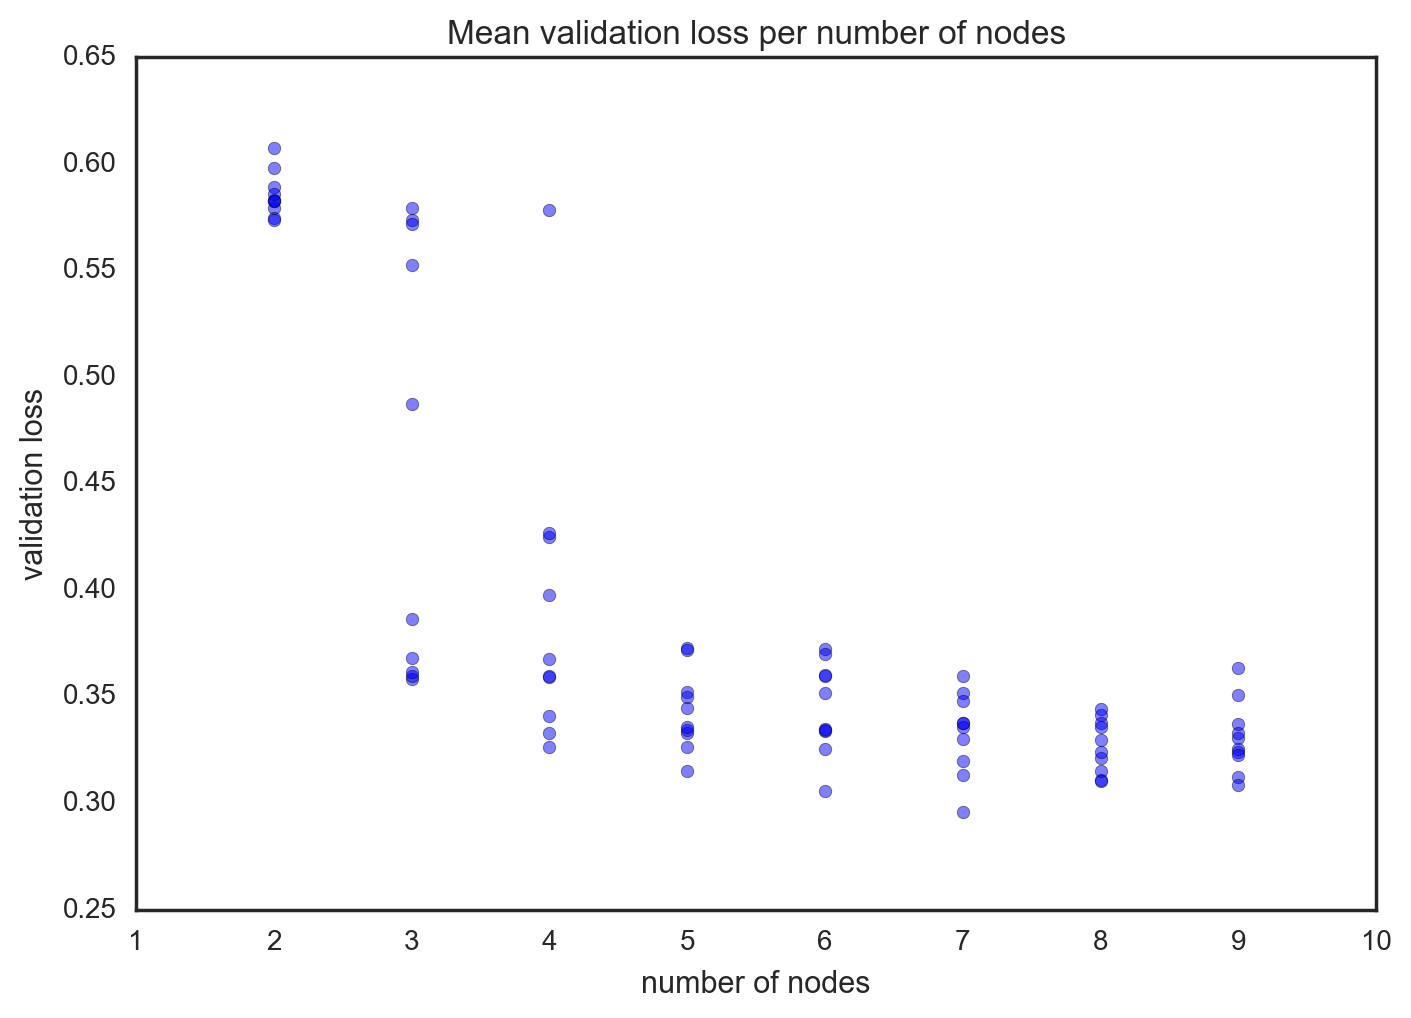

In [124]:
print ('Chosen 7 nodes')
plt.scatter(x=[r[0] for r in results], y=[r[1] for r in results], alpha=0.5);
plt.title('Mean validation loss per number of nodes')
plt.xlabel('number of nodes')
plt.ylabel('validation loss')
plt.show();

#### CHOOSE LEARNING RATE AND EPOCHS

Trained for different learning rates, best is 0.2. Chosen number of epochs where it stabilizes (around 80)

Chosen lr=0.2 x 80 epochs


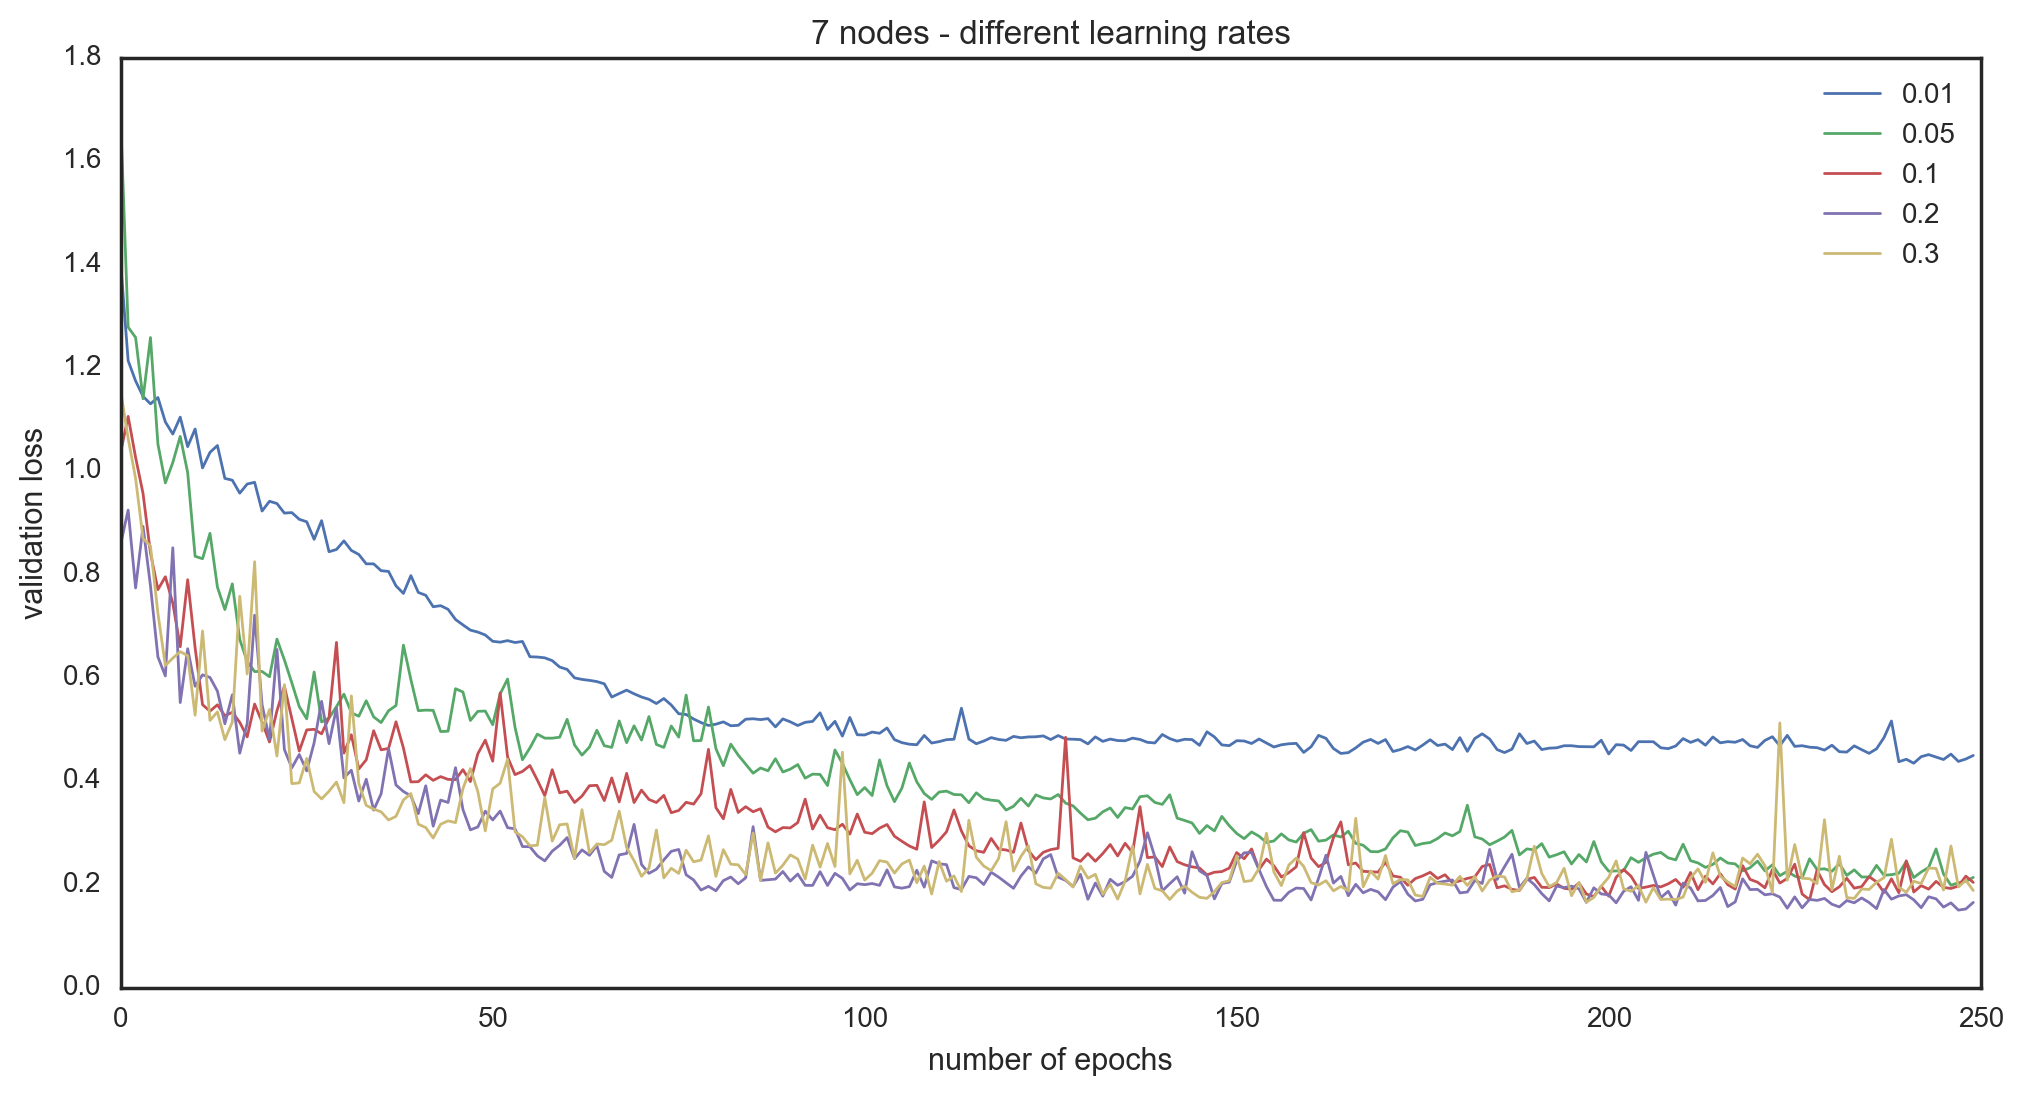

In [125]:
print ('Chosen lr=0.2 x 80 epochs')
fig=plt.figure(figsize=(12,6))
for x in results_lr:
    plt.plot(x[1], label=x[0], linewidth=1.);
plt.legend(loc='best')
plt.ylabel('validation loss')
plt.xlabel('number of epochs')
plt.title('7 nodes - different learning rates')
plt.show();

#### Check parameters chosen 3 times to see if there is too much variance in training

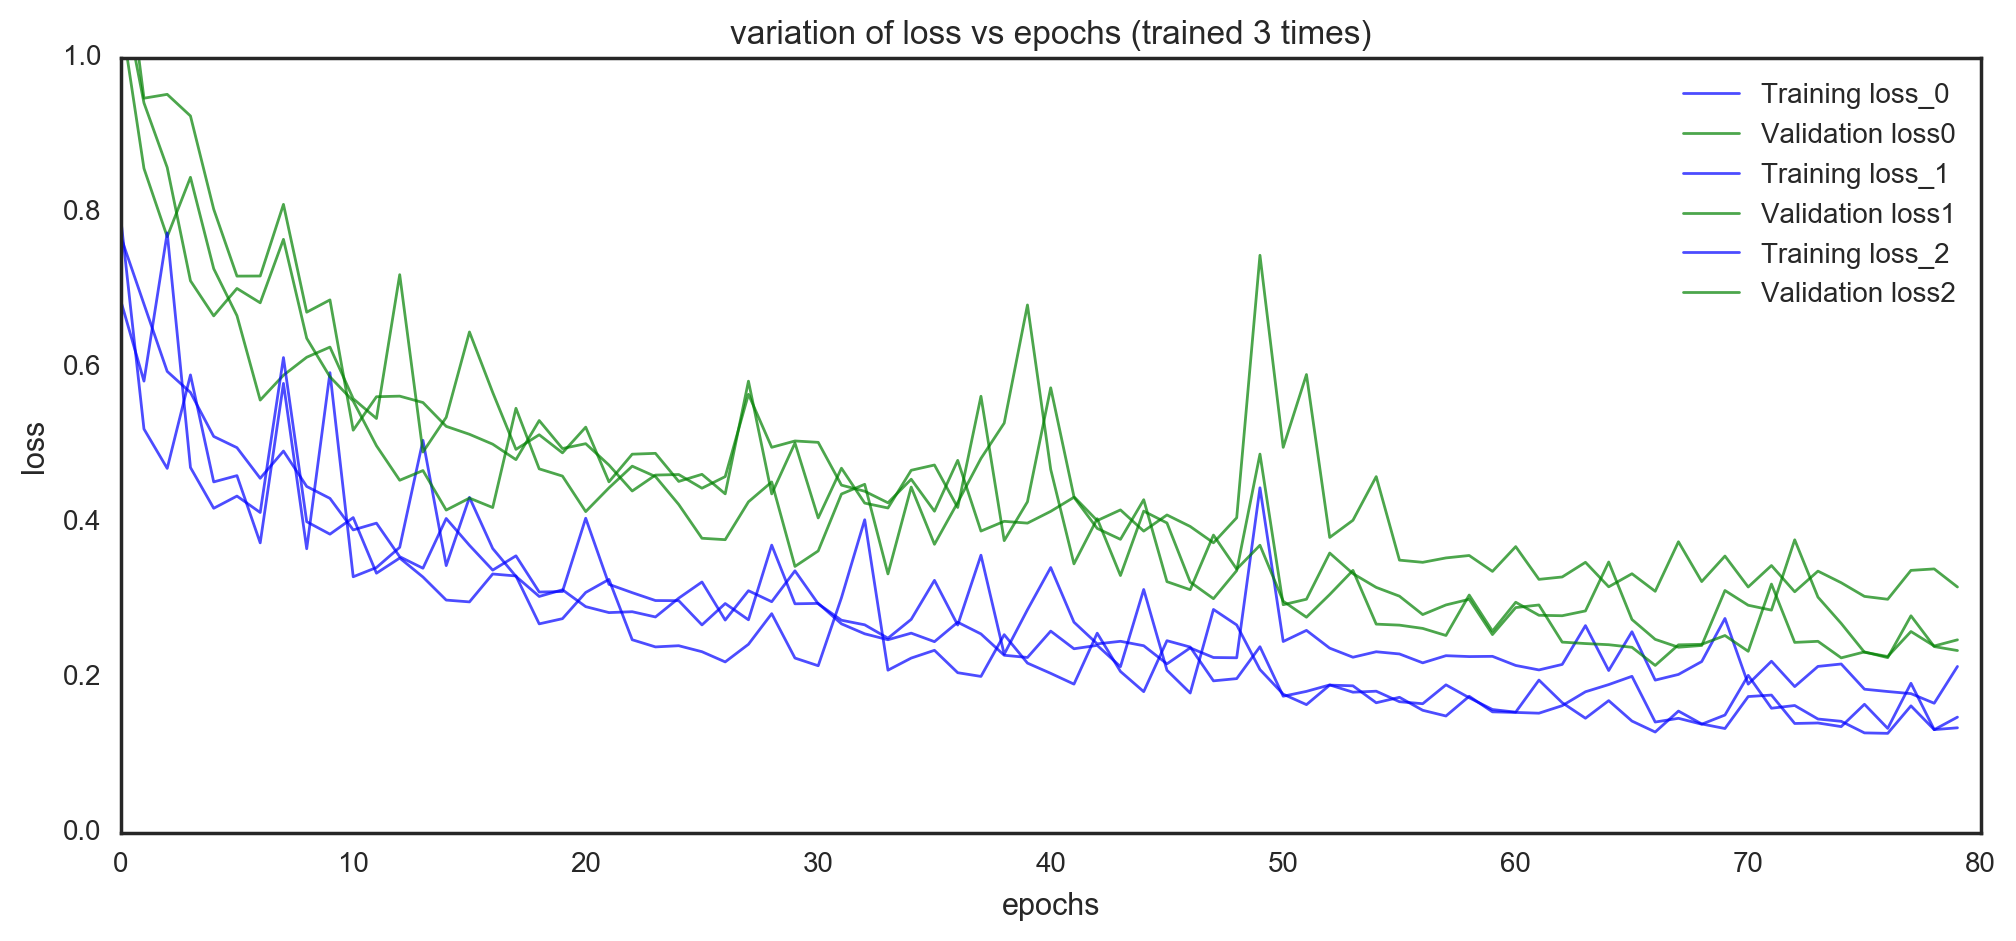

In [138]:
fig = plt.figure(figsize=(12,5))
for x, val_loss, train_loss in results_7nodes:
    plt.plot(train_loss, label='Training loss_'+str(x), linewidth=1., color='blue', alpha=0.7);
    plt.plot(val_loss, label='Validation loss' + str(x), linewidth=1., color='green', alpha=0.7);
plt.legend(loc='best');
plt.ylim(ymax=1);
plt.title('variation of loss vs epochs (trained 3 times)')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show();

### Train network with chosen parameters (7nodes, lr=0.2, 80 epochs)

In [142]:
%%time
import sys
fig = plt.figure(figsize=(12,6))
results_7nodes= []

### Set the hyperparameters here ###
epochs = 80
learning_rate = 0.2
hidden_nodes = 7
output_nodes = 1
N_i = train_features.shape[1]

network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['cnt']):

        network.train(record, target)

    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features), val_targets['cnt'].values)
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])

    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
        

    #Store mean validation and mean train errors
    # results = results + [[hidden_nodes, np.mean(losses['validation']), losses['train'],losses['validation']]]
#     results_7nodes = results_7nodes + [[i, losses['validation'], losses['train']]]
#     results_lr = results_lr + [[learning_rate,losses['validation']]]

Progress: 98.7% ... Training loss: 0.115 ... Validation loss: 0.233Wall time: 1.65 s


## Check out your predictions

Here, use the test data to view how well your network is modeling the data. If something is completely wrong here, make sure each step in your network is implemented correctly.

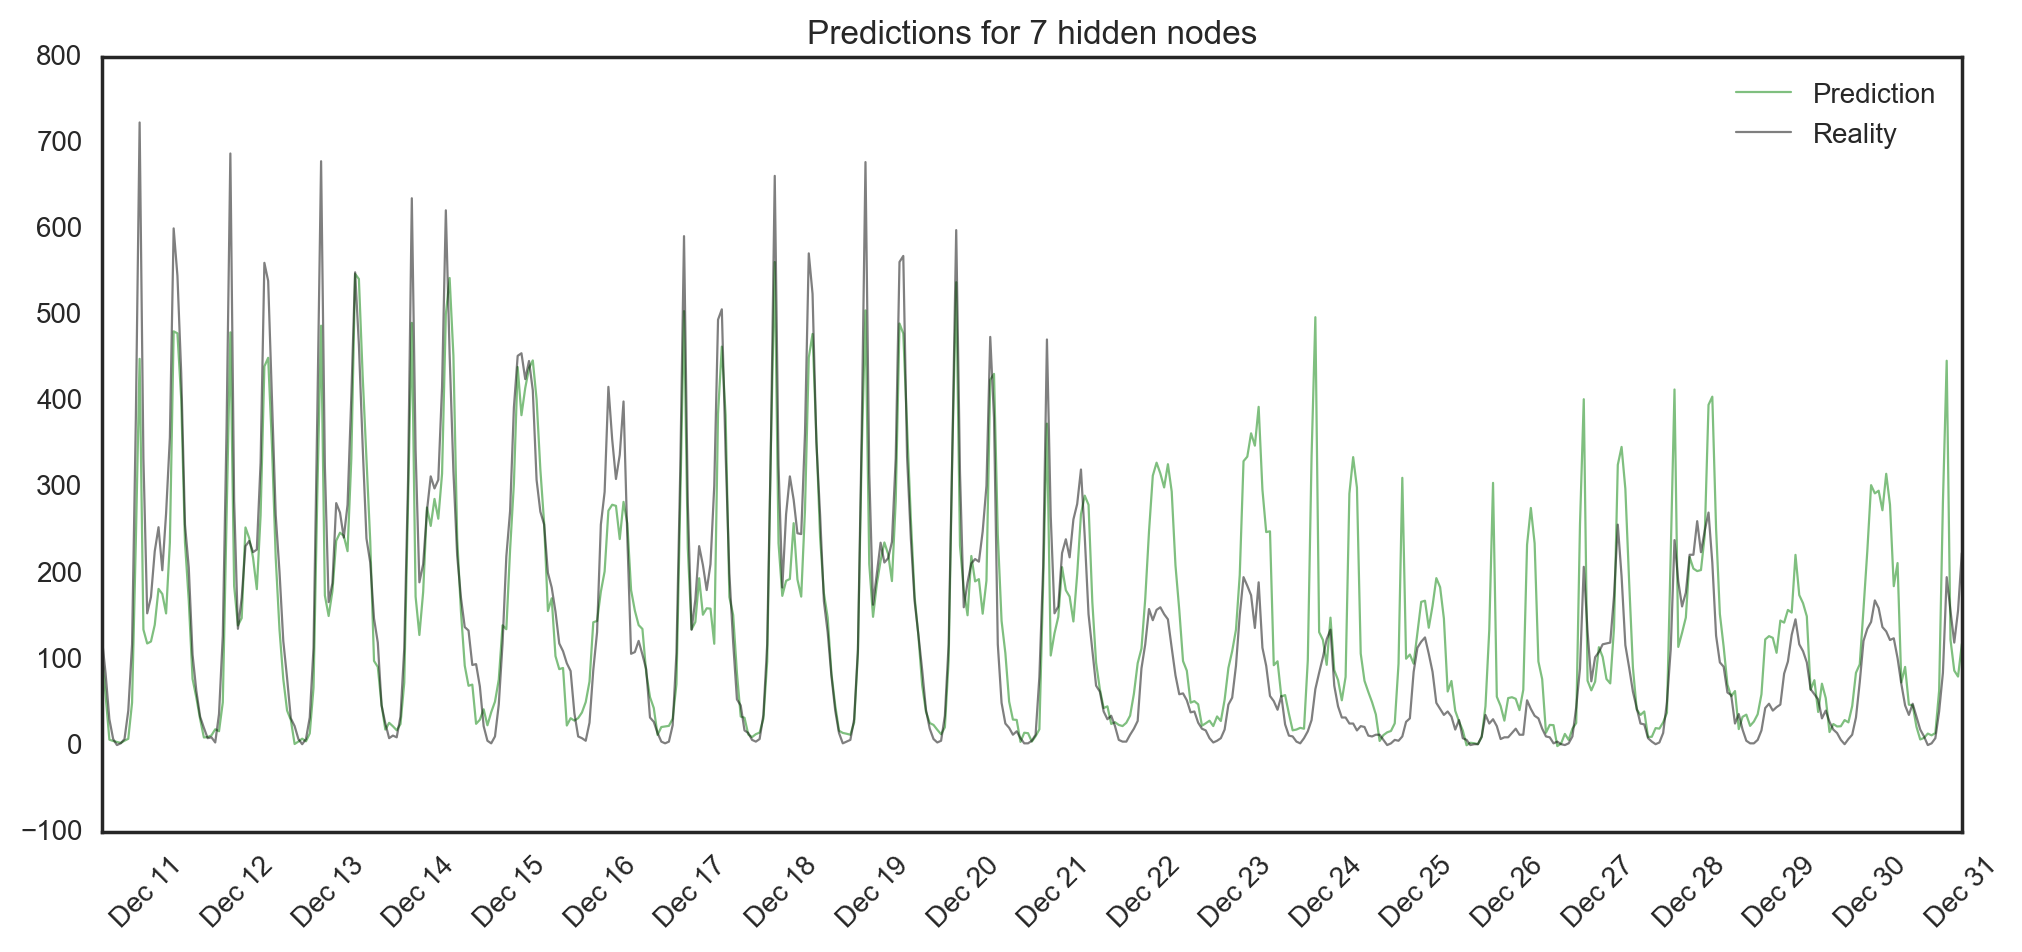

In [143]:
fig, ax = plt.subplots(figsize=(12,5))

mean, std = scaled_features['cnt']
predictions = network.run(test_features)*std + mean

ax.plot(predictions[0], label='Prediction', color='g', alpha=0.5, linewidth=0.8)
ax.plot((test_targets['cnt']*std + mean).values, color='k',label='Reality', alpha=0.5, linewidth=0.8)
ax.set_xlim(right=len(predictions))
ax.legend()
plt.title('Predictions for '+str(hidden_nodes)+' hidden nodes')
dates = pd.to_datetime(rides.ix[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)
plt.show();

## Thinking about your results
 
Answer these questions about your results. How well does the model predict the data? Where does it fail? Why does it fail where it does?

> **Note:** You can edit the text in this cell by double clicking on it. When you want to render the text, press control + enter

#### Your answer below

__a) How well does the model predict data?__   

To answer this question, let's check the error over the test data. instead of mean squared error, we will use root mean squeared error, better towards interpretability of results.

In [144]:
#predictions are stored as variable predictions
y_test = (test_targets['cnt']*std + mean).values
RMSE = np.sqrt(MSE(predictions[0,:], y_test))
print ('Error (RMSE): {:.2f} number of riders'.format(RMSE))
results = results + [[hidden_nodes,RMSE]]

Error (RMSE): 82.13 number of riders


The predictions fit well the reality, capturing hourly pattern very well , daily/weekly pattern at acceptable levels.

The number of neurons chosen(70) suggests that model captures several pattens (hourly / daily-weekly/ seasonal, probably windspeed, temperature...)

The plot below shows distribution of train set (blue) vs test set (green). It can be observed a season pattern and upward trend.

In [145]:
import datetime as dt
df = pd.read_csv(data_path)
df['dteday'] = pd.to_datetime(df['dteday'])
df['weekday'] = df.dteday.dt.weekday
df['week'] = df.dteday.dt.week
df['year'] = df.dteday.dt.year
df['dayyear'] = df.dteday.dt.dayofyear

df_train = df.iloc[:-21*24]
df_test = df.iloc[-21*24:]
df_test.reset_index(drop=True, inplace=True)
df_test['prediction']=predictions[0]

C:\Program Files\Anaconda3\envs\car3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


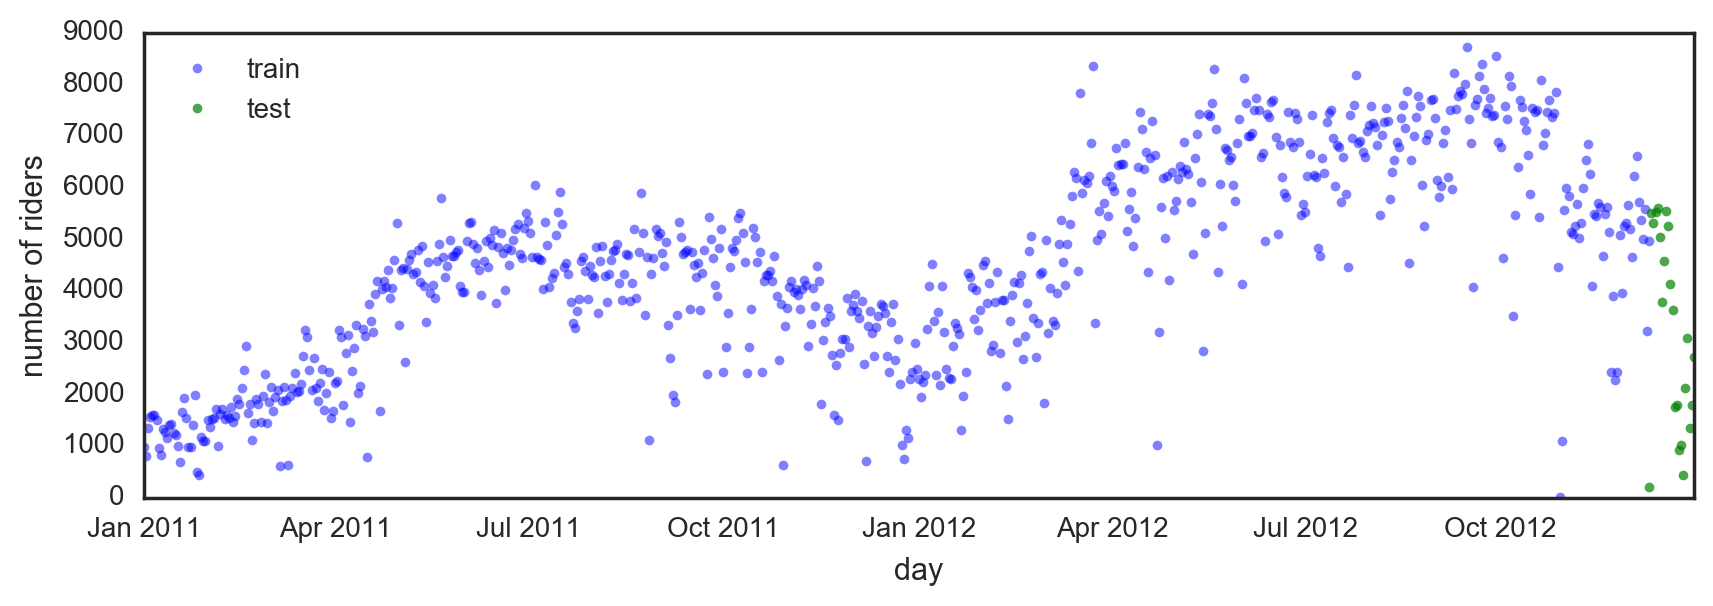

In [146]:
fig = plt.figure(figsize=(10,3))
df.set_index(df.week, inplace=True, drop=True)
plt.plot(df_train.groupby('dteday').cnt.sum(), 'b.',label='train', alpha=0.5)
plt.plot(df_test.groupby('dteday').cnt.sum(), 'g.', label='test', alpha=0.7)
plt.xlabel('day')
plt.legend(loc='best')
plt.ylabel('number of riders')
plt.show();

__b) Where does the model fail?__

The model seems to predict quite well up to 23rd December (day 357 onwards). At this point the model predicts more raiders than reality.

And in general, casual riders seem a bit more difficult to predict. Their use may be due to other factors not captured by data.


__c) Why does the model fail where it does?__


By analyzing data, my assumptions are:

Training data follows an upward trend, with more riders in 2012 than in 2011. Nevertheles, test shows that this pattern is not followed at the end of year, having similar number of riders in last week 2011 (train data) as last week 2012 (test data). Thus, test data contains a pattern not observed in train data.

Aditionally, the days mispredicted (22-23-24-25...) are special by themselves (end of year, Christmas, holidays...). It stands to reason that people's behaviour will differ from 2011 (Christmas on Sunday, EndYear on Saturday) than from 2012 (Christmas on  Tuesday, EndYear on Monday). I would suggest to use several year's data to capture this patterns.

Below I add several plots used for this analysis:

* Number of daily riders, comparing train data of year 2011, train data of year 2012, test data and predicted data: from this plot it can be observed that prediction (red) is way highera than reality (green). Probably because model expects that data will follow the upward trend observed in train data.

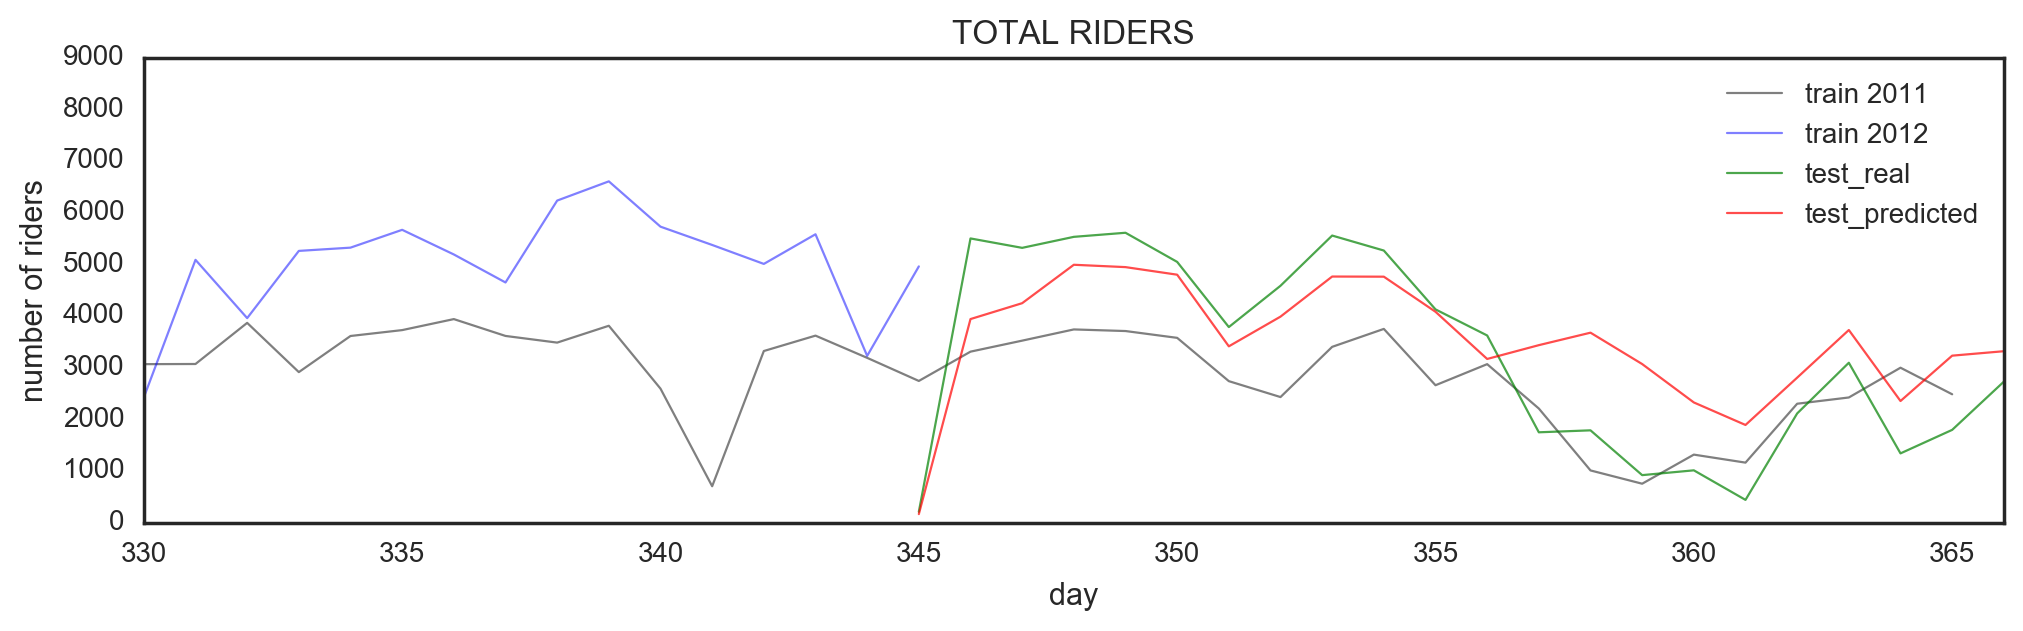

In [147]:
fig = plt.figure(figsize=(12,3))
df.set_index(df.week, inplace=True, drop=True)
plt.plot(df_train[df_train.year==2011].groupby('dayyear').cnt.sum(), 'k-',label='train 2011', alpha=0.5, linewidth=0.8)
plt.plot(df_train[df_train.year==2012].groupby('dayyear').cnt.sum(), 'b-',label='train 2012', alpha=0.5, linewidth=0.8)
plt.plot(df_test.groupby('dayyear').cnt.sum(), 'g-', label='test_real', alpha=0.7,linewidth=0.8)
plt.plot(df_test.groupby('dayyear').prediction.sum(), 'r-', label='test_predicted', alpha=0.7,linewidth=0.8)
plt.xlabel('day')
plt.legend(loc='best')
plt.title('TOTAL RIDERS')
plt.ylabel('number of riders')
plt.xlim(xmin=330, xmax=366)
plt.show();

* Number of daily CASUAL riders: it shows that casual riders follow a more random pattern. Weekly pattern observed.

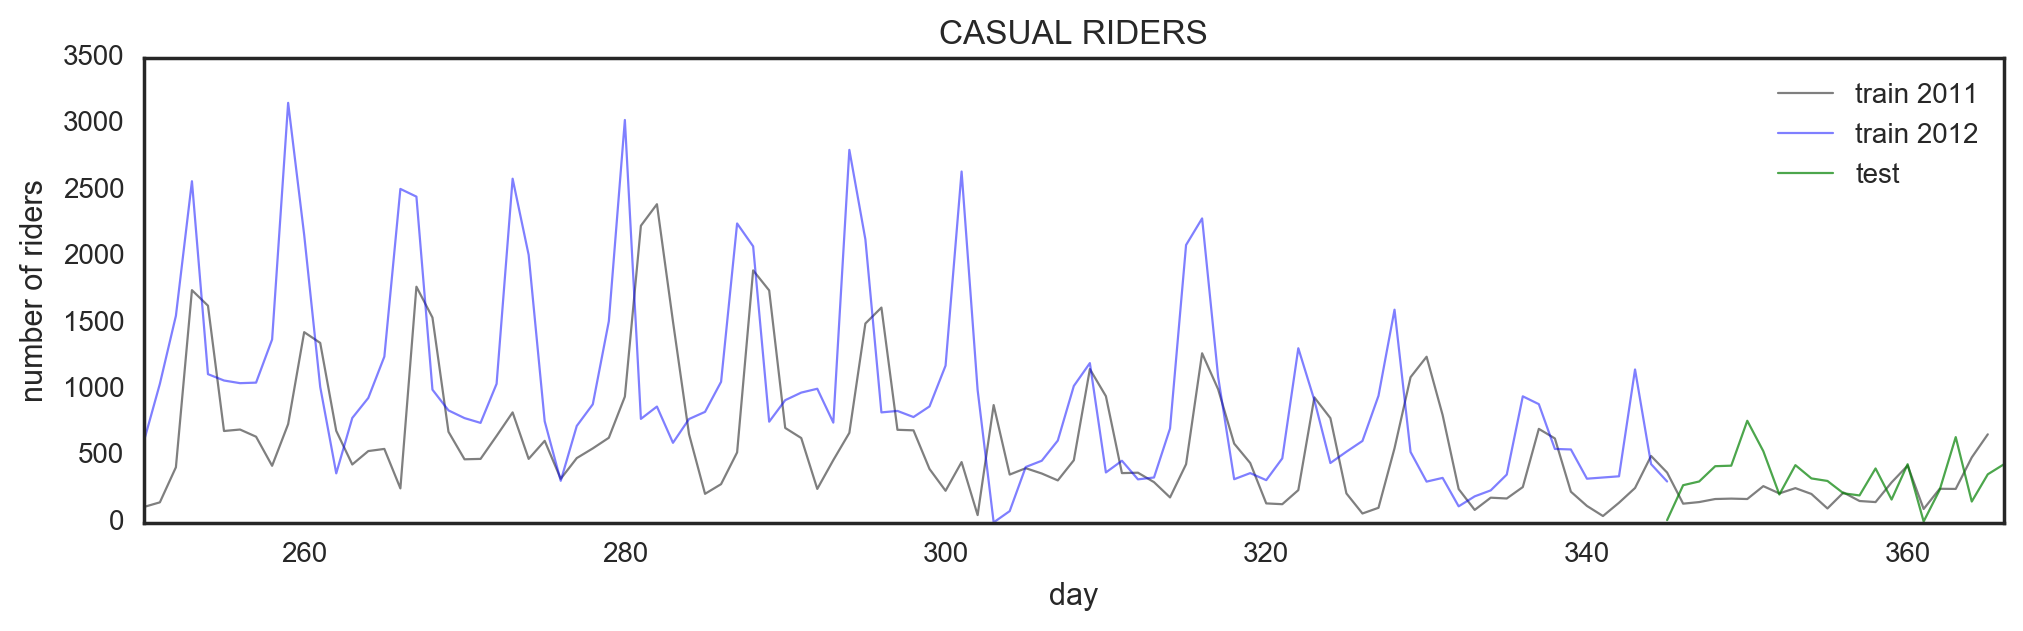

In [148]:
fig = plt.figure(figsize=(12,3))
df.set_index(df.week, inplace=True, drop=True)
plt.plot(df_train[df_train.year==2011].groupby('dayyear').casual.sum(), 'k-',label='train 2011', alpha=0.5, linewidth=0.8)
plt.plot(df_train[df_train.year==2012].groupby('dayyear').casual.sum(), 'b-',label='train 2012', alpha=0.5, linewidth=0.8)
plt.plot(df_test.groupby('dayyear').casual.sum(), 'g-', label='test', alpha=0.7,linewidth=0.8)

plt.xlabel('day')
plt.legend(loc='best')
plt.title('CASUAL RIDERS')
plt.ylabel('number of riders')
plt.xlim(xmin=250, xmax=366)
plt.show();

* Number of daily REGISTERED riders: it shows that even though there are more registered riders in 2012 than in 2011, this observed behaviour does not apply at end of year

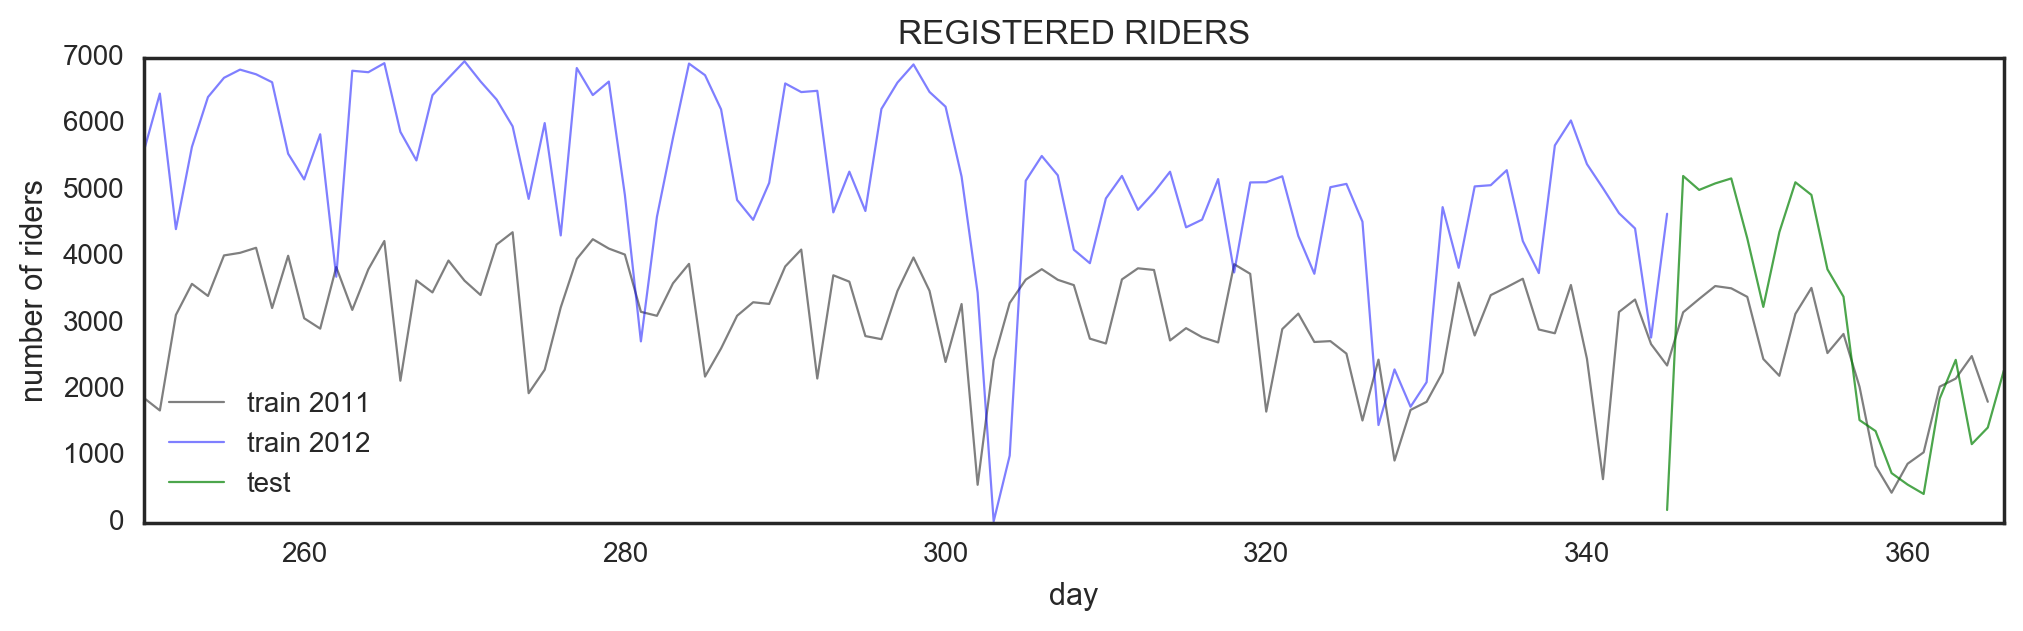

In [149]:
fig = plt.figure(figsize=(12,3))
df.set_index(df.week, inplace=True, drop=True)
plt.plot(df_train[df_train.year==2011].groupby('dayyear').registered.sum(), 'k-',label='train 2011', alpha=0.5, linewidth=0.8)
plt.plot(df_train[df_train.year==2012].groupby('dayyear').registered.sum(), 'b-',label='train 2012', alpha=0.5, linewidth=0.8)
plt.plot(df_test.groupby('dayyear').registered.sum(), 'g-', label='test', alpha=0.7,linewidth=0.8)
plt.xlabel('day')
plt.legend(loc='best')
plt.title('REGISTERED RIDERS')
plt.ylabel('number of riders')
plt.xlim(xmin=250, xmax=366)
plt.show();

## Unit tests

Run these unit tests to check the correctness of your network implementation. These tests must all be successful to pass the project.

In [150]:
import unittest

inputs = [0.5, -0.2, 0.1]
targets = [0.4]
test_w_i_h = np.array([[0.1, 0.4, -0.3], 
                       [-0.2, 0.5, 0.2]])
test_w_h_o = np.array([[0.3, -0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'bike-sharing-dataset/hour.csv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(rides, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328, -0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014,  0.39775194, -0.29887597],
                                              [-0.20185996,  0.50074398,  0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

.....
----------------------------------------------------------------------
Ran 5 tests in 0.005s

OK


<unittest.runner.TextTestResult run=5 errors=0 failures=0>